In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import datetime
import calendar

In [2]:
VIX = pd.read_csv('/Users/Lee/Desktop/research-1/^VIX.csv')

In [3]:
def clean_data(df):
    df.Date = pd.to_datetime(df.Date)

    df['day_of_week'] = df['Date'].dt.weekday_name

    df = df.drop(['High','Low','Close','Volume'],axis=1)

    df['Consecutive trading day'] = df['day_of_week'].shift(1) + ' to ' + df['day_of_week']

    df['Overnight return'] = df['Open'] - df['Adj Close'].shift(1)

    df['Overnight % change'] = (df['Overnight return']/df['Adj Close'].shift(1))*100

    df['Overnight Volatility'] = df['Overnight % change'].rolling(window=20).std()

    df = df.dropna()

    return df

In [4]:
VIX = clean_data(VIX)

In [5]:
def summary(df,target):
    # Histogram of overnight return/volatility of consecutive trading days
    fig, ax = plt.subplots(figsize=(20,20),nrows=3,ncols=2,sharex=True, sharey=True)
#     axes = plt.gca()
#     axes.set_ylim(y_lim)
#     axes.set_xlim(x_lim)
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target],
                 kde=False, ax=ax[0][0]).set_title('Mon-Tue {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target],
                 kde=False, ax=ax[0][1]).set_title('Tue-Wed {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target],
                 kde=False, ax=ax[1][0]).set_title('Wed-Thurs {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target],
                 kde=False, ax=ax[1][1]).set_title('Thurs-Fri {} histogram'.format(target))
    sns.distplot(df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target],
                 kde=False, ax=ax[2][0]).set_title('Fri-Mon {} histogram'.format(target))

    # Stats of Consecutive Trading Days Overnight Returns/Volatility 
    means=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].mean(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].mean()]

    stds=[df.loc[df['Consecutive trading day'] == 'Monday to Tuesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Tuesday to Wednesday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Wednesday to Thursday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Thursday to Friday'][target].std(),
          df.loc[df['Consecutive trading day'] == 'Friday to Monday'][target].std()]
    
    overnight_summary = pd.DataFrame([means,stds])
    overnight_summary = overnight_summary.transpose()
    overnight_summary.columns = ['Mean of {}'.format(target), 'Standard Deviation of {}'.format(target)]
    overnight_summary.index = ['Monday to Tuesday', 'Tuesday to Wednesday', 'Wednesday to Thursday',
                                     'Thursday to Friday', 'Friday to Monday']
    return overnight_summary

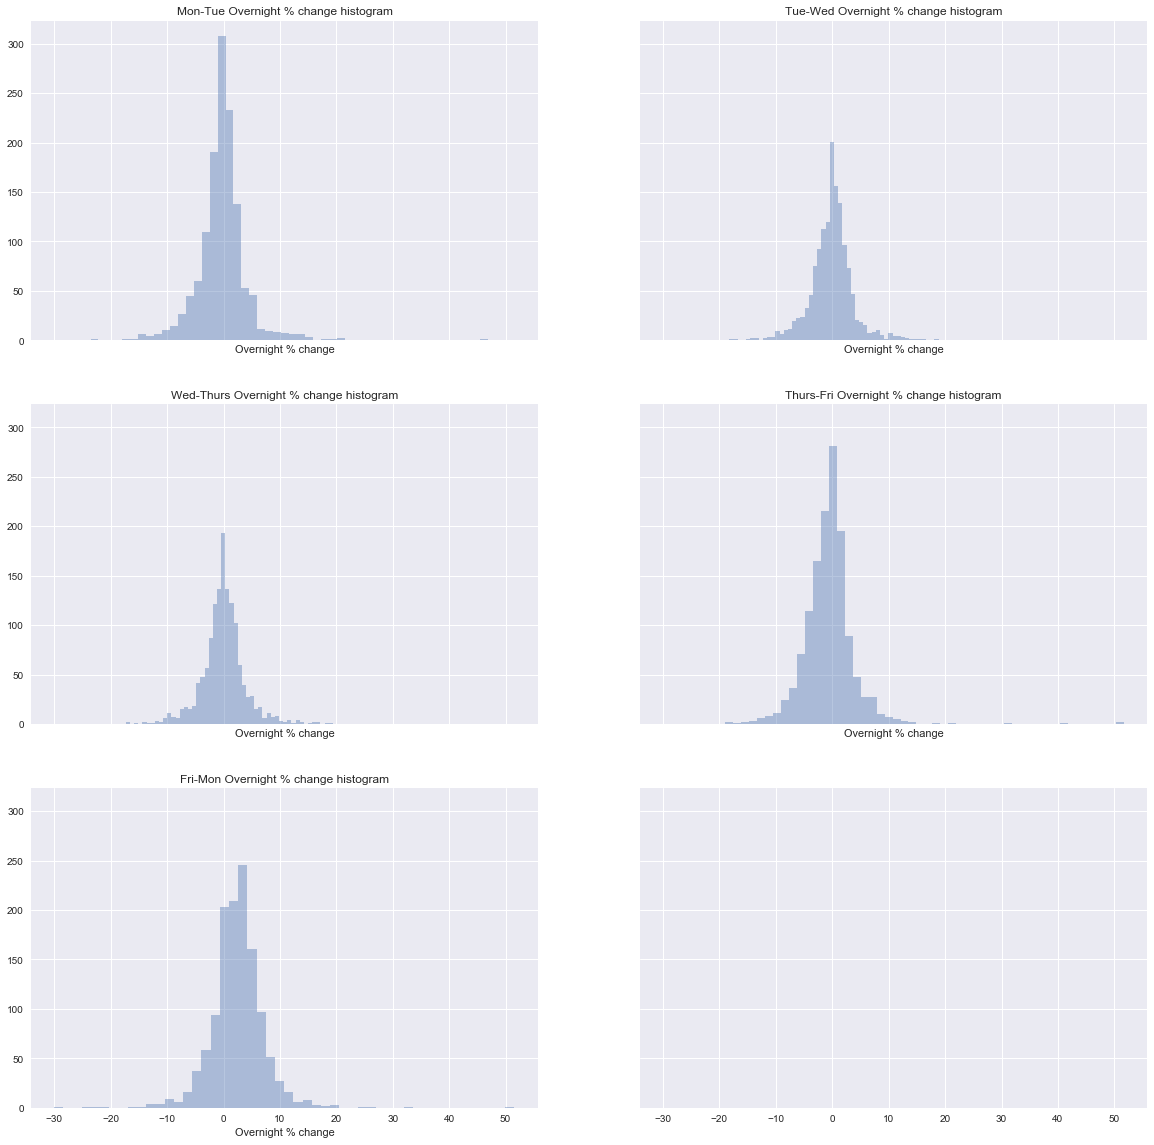

In [19]:
VIX_return_summary = summary(VIX,'Overnight % change')

In [20]:
VIX_return_summary

,Mean of Overnight % change,Standard Deviation of Overnight % change
Monday to Tuesday,-0.273747,4.291231
Tuesday to Wednesday,-0.168048,3.724333
Wednesday to Thursday,-0.043556,3.881046
Thursday to Friday,-0.640852,4.666818
Friday to Monday,2.435336,4.902899


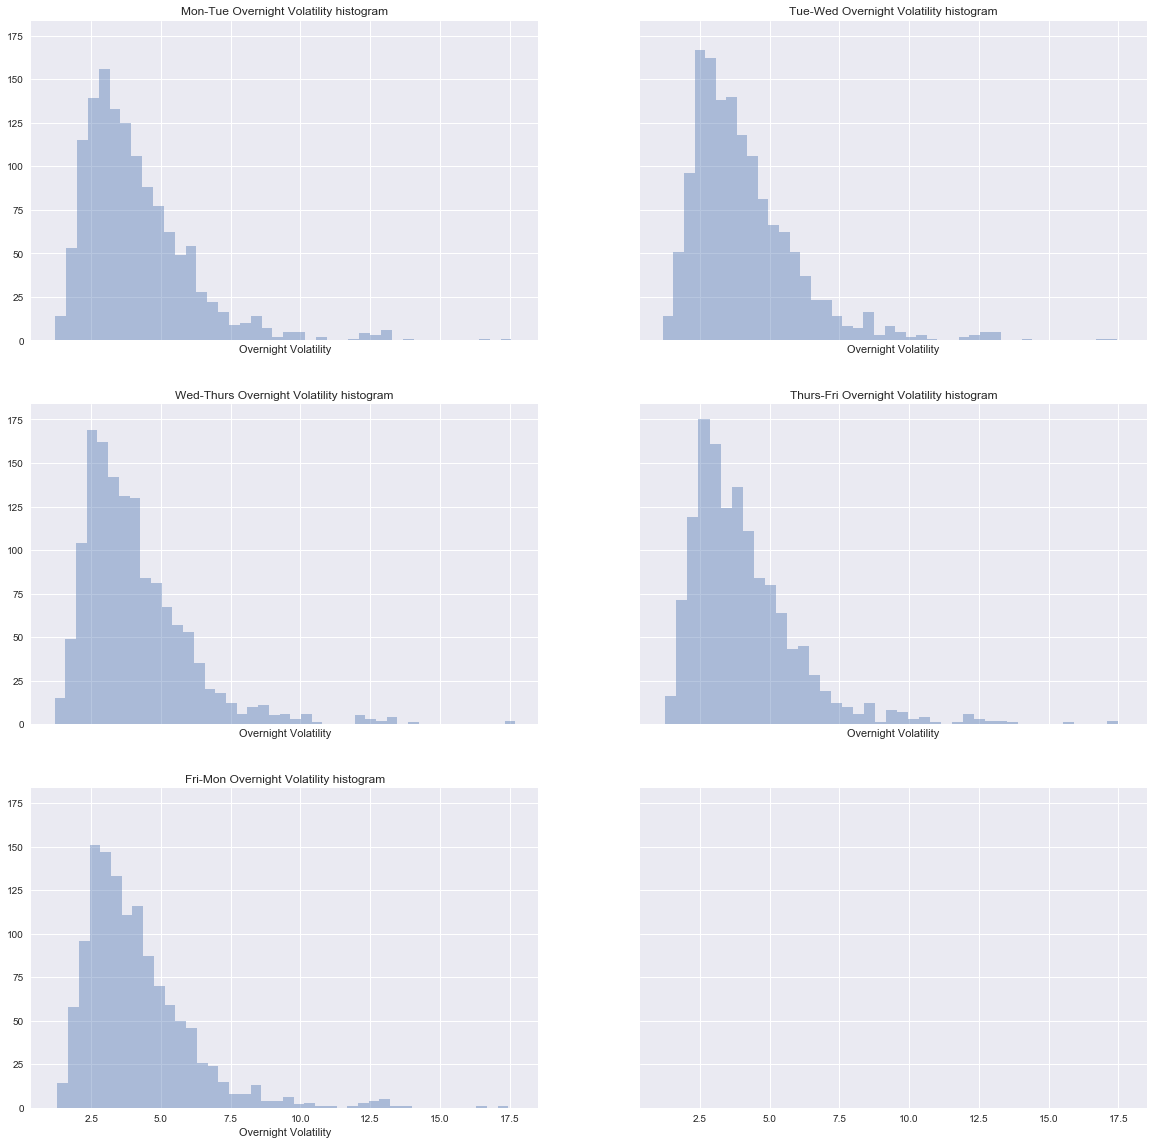

In [21]:
VIX_volatility_summary = summary(VIX,'Overnight Volatility')

In [22]:
VIX_volatility_summary

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,4.120998,1.958372
Tuesday to Wednesday,4.093782,1.952029
Wednesday to Thursday,4.088227,1.945190
Thursday to Friday,4.103896,1.973485
Friday to Monday,4.146433,1.950329


In [11]:
AAPL = pd.read_csv('/Users/Lee/Desktop/research-1/AAPL_5years.csv')

In [12]:
AAPL['Open'] = pd.to_numeric(AAPL['Open'],errors='coerce')

In [13]:
AAPL['Adj Close'] = pd.to_numeric(AAPL['Adj Close'], errors='coerce')

In [14]:
AAPL = clean_data(AAPL)

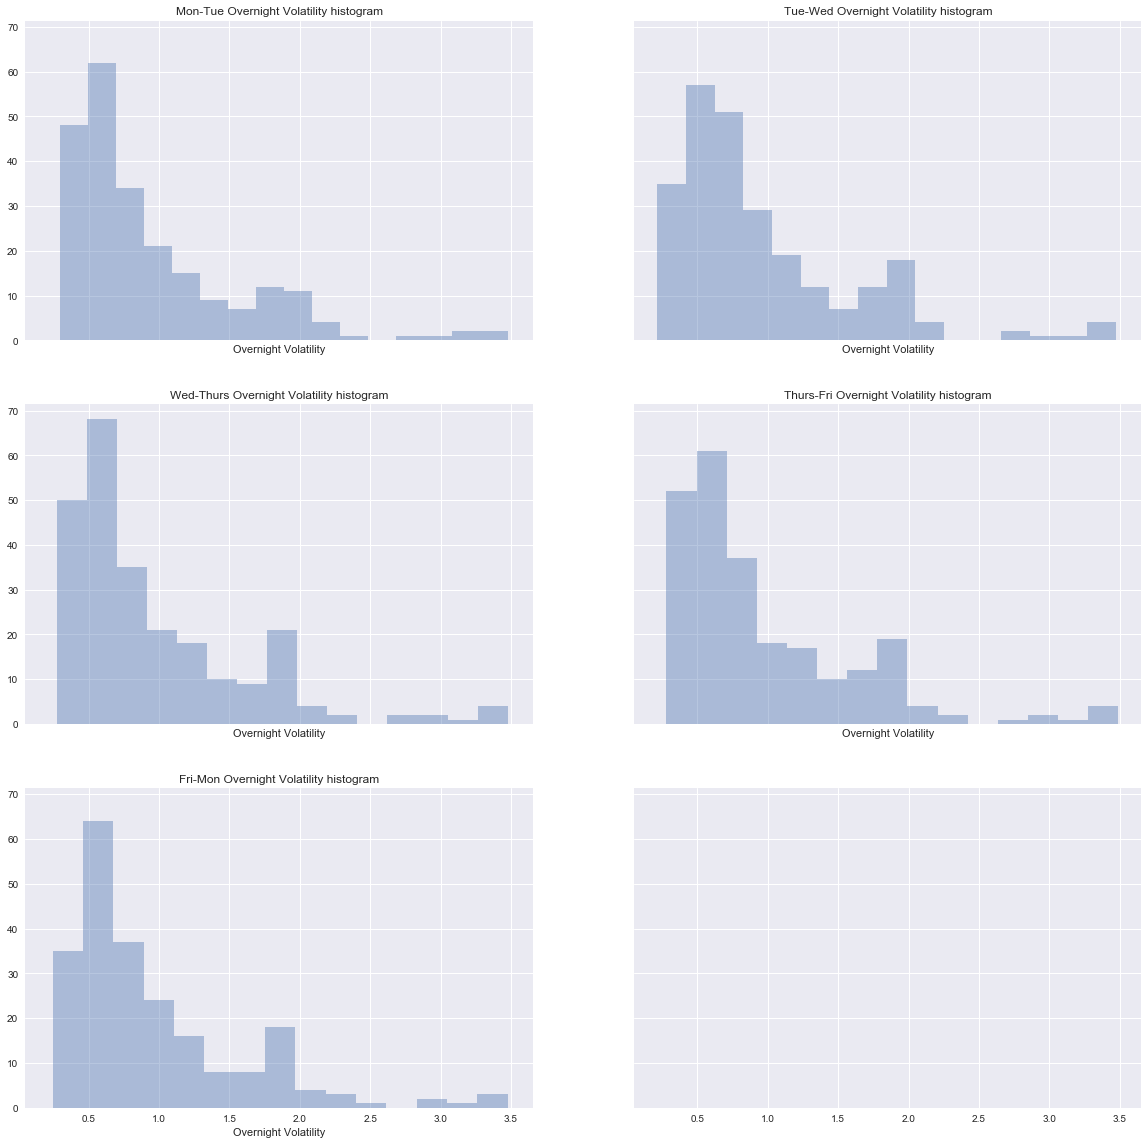

In [15]:
AAPL_summary_volatility = summary(AAPL,'Overnight Volatility')

In [16]:
AAPL_summary_volatility

,Mean of Overnight Volatility,Standard Deviation of Overnight Volatility
Monday to Tuesday,0.950676,0.621278
Tuesday to Wednesday,0.960984,0.638257
Wednesday to Thursday,0.965502,0.651901
Thursday to Friday,0.980158,0.645578
Friday to Monday,0.966946,0.630570


### may need some kinds of statistical tests to see if the difference of the volatility is sigificant?